# Covid19-Project

Importing Libraries & DataSet

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import random as r
df= pd.read_csv('12-12-2020.csv')

# Task 1

Write a Python program to display the first 5 rows from COVID-19 dataset. Also print the dataset information and check the missing values

In [11]:
print(df)
print("\nDataset information:")
print(df.info())
print("\nMissing data information:")
print(df.isna().sum())

      FIPS Admin2 Province_State      Country_Region          Last_Update  \
0      NaN    NaN            NaN         Afghanistan  2020-12-13 05:27:20   
1      NaN    NaN            NaN             Albania  2020-12-13 05:27:20   
2      NaN    NaN            NaN             Algeria  2020-12-13 05:27:20   
3      NaN    NaN            NaN             Andorra  2020-12-13 05:27:20   
4      NaN    NaN            NaN              Angola  2020-12-13 05:27:20   
...    ...    ...            ...                 ...                  ...   
3971   NaN    NaN            NaN             Vietnam  2020-12-13 05:27:20   
3972   NaN    NaN            NaN  West Bank and Gaza  2020-12-13 05:27:20   
3973   NaN    NaN            NaN               Yemen  2020-12-13 05:27:20   
3974   NaN    NaN            NaN              Zambia  2020-12-13 05:27:20   
3975   NaN    NaN            NaN            Zimbabwe  2020-12-13 05:27:20   

            Lat       Long_  Confirmed  Deaths  Recovered   Active  \
0    

# Task 2

Write a Python program to get the latest number of confirmed, deaths, recovered and active cases of Novel Coronavirus (COVID-19) Country wise

In [12]:
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
results = df.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
print(results)

         Country_Region  Confirmed  Deaths  Recovered  Active
0           Afghanistan      48229    1956      38200    8073
1               Albania      47742     989      24520   22233
2               Algeria      91638    2584      60028   29026
3               Andorra       7288      78       6629     581
4                Angola      16161     366       8841    6954
..                  ...        ...     ...        ...     ...
186             Vietnam       1395      35       1238     122
187  West Bank and Gaza     108099     961      83123   24015
188               Yemen       2083     606       1383      94
189              Zambia      18217     366      17339     512
190            Zimbabwe      11219     307       9359    1553

[191 rows x 5 columns]


<ipython-input-12-8f8519d13b6c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  results = df.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()


# Task 3

Write a Python program to get the latest number of confirmed deaths and recovered people of Novel Coronavirus (COVID-19) cases Country/Region - Province/State wise

In [14]:
data = df.groupby(['Country_Region', 'Province_State'])['Confirmed', 'Deaths', 'Recovered'].max()
pd.set_option('display.max_rows', None)
print(data)

                                                         Confirmed  Deaths  \
Country_Region Province_State                                                
Australia      Australian Capital Territory                    117       3   
               New South Wales                                4642      53   
               Northern Territory                               62       0   
               Queensland                                     1226       6   
               South Australia                                 562       4   
               Tasmania                                        234      13   
               Victoria                                      20351     820   
               Western Australia                               836       9   
Belgium        Antwerp                                       71827       0   
               Brussels                                      78384       0   
               East Flanders                                 580

<ipython-input-14-e373c63155f6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby(['Country_Region', 'Province_State'])['Confirmed', 'Deaths', 'Recovered'].max()


# Task 4

Write a Python program to get the Chinese province wise cases of confirmed, deaths and recovered cases of Novel Coronavirus (COVID-19).

In [19]:
c_data = df[df['Country_Region']=='China']
c_data = c_data[['Province_State', 'Confirmed', 'Deaths', 'Recovered']]
rs1 = c_data.sort_values(by='Confirmed', ascending=False)
rs1 = rs1.reset_index(drop=True)
print(rs1)

    Province_State  Confirmed  Deaths  Recovered
0            Hubei      68149    4512      63636
1        Hong Kong       7446     115       6114
2        Guangdong       2016       8       1972
3         Shanghai       1405       7       1309
4         Zhejiang       1296       1       1290
5            Henan       1295      22       1266
6            Hunan       1020       4       1016
7            Anhui        992       6        986
8         Xinjiang        980       3        977
9     Heilongjiang        956      13        936
10         Beijing        954       9        940
11         Jiangxi        935       1        934
12        Shandong        858       7        841
13         Sichuan        829       3        792
14         Jiangsu        684       0        675
15       Chongqing        590       6        583
16          Fujian        502       1        460
17         Shaanxi        502       3        481
18           Hebei        373       6        367
19  Inner Mongolia  

# Task 5

Write a Python program to get the latest country wise deaths cases of Novel Coronavirus (COVID-19)

In [20]:
data = df.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
rs2 = data[data['Deaths']>0][['Country_Region', 'Deaths']]
print(rs2)

               Country_Region  Deaths
0                 Afghanistan    1956
1                     Albania     989
2                     Algeria    2584
3                     Andorra      78
4                      Angola     366
5         Antigua and Barbuda       4
6                   Argentina   40668
7                     Armenia    2462
8                   Australia     908
9                     Austria    4415
10                 Azerbaijan    1883
11                    Bahamas     163
12                    Bahrain     348
13                 Bangladesh    7020
14                   Barbados       7
15                    Belarus    1254
16                    Belgium   17792
17                     Belize     192
18                      Benin      44
20                    Bolivia    9014
21     Bosnia and Herzegovina    3298
22                   Botswana      37
23                     Brazil  181123
24                     Brunei       3
25                   Bulgaria    5626
26          

<ipython-input-20-ab2e5e2d5dc9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()


# Task 6

Write a Python program to list countries with no cases of Novel Coronavirus (COVID-19) recovered

In [21]:
data2 = df.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
rs3 = data[data['Recovered']==0][['Country_Region', 'Confirmed', 'Deaths', 'Recovered']]
print(rs3)

    Country_Region  Confirmed  Deaths  Recovered
16         Belgium     603159   17792          0
151         Serbia     261437    2275          0
165         Sweden     320098    7514          0


<ipython-input-21-a30f6399d1ac>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data2 = df.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()


# Task 7

Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) died

In [24]:
data3 = df.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
rs4 = data3[data['Confirmed']==data['Deaths']]
rs4 = rs4[['Country_Region', 'Confirmed', 'Deaths']]
rs4 = rs4.sort_values('Confirmed', ascending=False)
rs4 = rs4[result['Confirmed']>0]
rs4 = rs4.reset_index(drop=True)
print(rs4)

Empty DataFrame
Columns: [Country_Region, Confirmed, Deaths]
Index: []


<ipython-input-24-420a6d6ff369>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data3 = df.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
<ipython-input-24-420a6d6ff369>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result5 = result5[result['Confirmed']>0]


# Task 8

Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) recovered

In [26]:
data4 = df.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
rs5 = data4[data['Confirmed']==data['Recovered']]
rs5 = rs5[['Country_Region', 'Confirmed', 'Recovered']]
rs5 = rs5.sort_values('Confirmed', ascending=False)
rs5 = rs5[rs5['Confirmed']>0]
rs5 = rs5.reset_index(drop=True)
print(rs5)

     Country_Region  Confirmed  Recovered
0  Marshall Islands          4          4
1             Samoa          2          2
2           Vanuatu          1          1


<ipython-input-26-0358076f383f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data4 = df.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()


# Task 9

Write a Python program to get the top 10 countries data (Last Update, Country/Region, Confirmed, Deaths, Recovered) of Novel Coronavirus (COVID-19)

# Task 10

Write a Python program to create a plot (lines) of total deaths, confirmed, recovered and active cases Country wise where deaths greater than 150

<ipython-input-27-f3d793ec7c93>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  r_data = df.groupby(["Country_Region"])["Deaths", "Confirmed", "Recovered", "Active"].sum().reset_index()


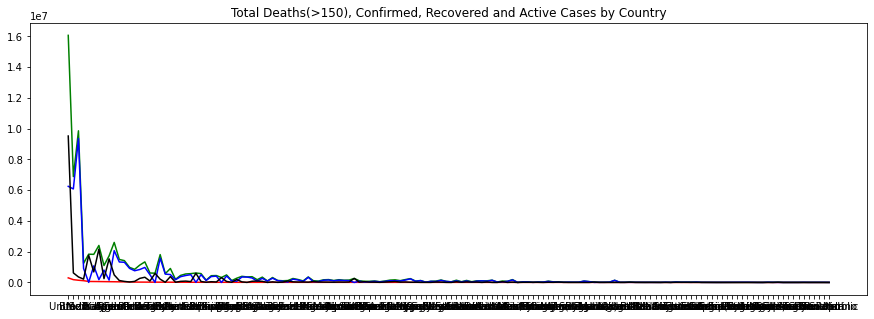

In [27]:
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
 
r_data = df.groupby(["Country_Region"])["Deaths", "Confirmed", "Recovered", "Active"].sum().reset_index()
r_data = r_data.sort_values(by='Deaths', ascending=False)
r_data = r_data[r_data['Deaths']>50]
plt.figure(figsize=(15, 5))
plt.plot(r_data['Country_Region'], r_data['Deaths'],color='red')
plt.plot(r_data['Country_Region'], r_data['Confirmed'],color='green')
plt.plot(r_data['Country_Region'], r_data['Recovered'], color='blue')
plt.plot(r_data['Country_Region'], r_data['Active'], color='black')
 
plt.title('Total Deaths(>150), Confirmed, Recovered and Active Cases by Country')
plt.show()

# Task 11

Write a Python program to visualize the state/province wise death cases of Novel Coronavirus (COVID-19) in USA

In [7]:
us_data1 = df[df['Country_Region']=='US'].drop(['Country_Region'], axis=1)
us_data1 = us_data1[us_data1.sum(axis = 1) > 0]
us_data1 = us_data1.groupby(['Province_State'])['Deaths'].sum().reset_index()
us_data_death = us_data1[us_data1['Deaths'] > 0]
state_fig = px.bar(us_data_death, x='Province_State', y='Deaths', title='State wise deaths reported of COVID-19 in USA', text='Deaths')
state_fig.show()

# Task 12

Write a Python program to visualize the state/province wise Active cases of Novel Coronavirus (COVID-19) in USA

In [8]:
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
us_data2 = df[df['Country_Region']=='US'].drop(['Country_Region',], axis=1)
us_data2 = us_data2[us_data2.sum(axis = 1) > 0]
 
us_data2 = us_data2.groupby(['Province_State'])['Active'].sum().reset_index()
us_data_death = us_data2[us_data2['Active'] > 0]
state_fig = px.bar(us_data_death, x='Province_State', y='Active', title='State wise recovery cases of COVID-19 in USA', text='Active')
state_fig.show()

# Task 13

Write a Python program to visualize the state/province wise combined number of confirmed, deaths, recovered, active Novel Coronavirus (COVID-19) cases in Pakistan

In [9]:
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
pk_data = df[df['Country_Region']=='Pakistan'].drop(['Country_Region',], axis=1)
pk_data = pk_data[pk_data.sum(axis = 1) > 0]
pk_data = pk_data.groupby(['Province_State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
pk_data = pd.melt(pk_data, id_vars='Province_State', value_vars=['Confirmed', 'Deaths', 'Recovered', 'Active'], value_name='Count', var_name='Case')
fig = px.bar(pk_data, x='Province_State', y='Count', text='Count', barmode='group', color='Case', title='Pakistan State wise combine number of confirmed, deaths, recovered, active COVID-19 cases')
fig.show()

<ipython-input-9-ee253ad7b6ea>:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



# Task 14

Write a Python program to visualize Worldwide Confirmed Novel Coronavirus (COVID-19) cases over time

In [11]:
grouped = df.groupby('Last_Update')['Last_Update', 'Confirmed', 'Deaths'].sum().reset_index()
fig = px.line(grouped, x="Last_Update", y="Confirmed", title="Worldwide Confirmed Novel Coronavirus(COVID-19) Cases Over Time")
fig.show()

<ipython-input-11-7d51ac72ef10>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

